# 演習1
ユークリッドの互除法を実装する. 
ユークリッドの互除法は以下の手順で実行される.

1. 自然数 $m, n (m \ge n)$ を入力する.
2. $n = 0$ なら, $m$ を出力して終了
3. $m$ を $n$ を割ったときの剰余を $n$ として更新し, 元の $n$ を $m$ として更新して, 2に戻る.

In [10]:
m = input('input: M')
m = int(m)
n = input('input: N')
n = int(n)
if n >= m: # 一応条件を満たすようにスワップする部分も実装
    tmp = m
    m = n
    n = tmp

print(m, n)

1071 1029


In [11]:
while n != 0:
    tmp = m % n  # mとnの剰余を一時保持して
    m = n  # mを更新してから
    n = tmp  # nを剰余で更新
print(m)

21


# 演習2
エラトステネスの篩は以下の手順を実装する

1. 指定された整数 $x$ 分の要素を持つ`list`を用意して, 1番目を`False`として, 2番目以降は`True`とする.
2. 先頭から順に走査を行い, `True`である要素の添字 $p$ を素数の一覧に追加し, $p^2$ 以上の $p$ の倍数の添字の要素を`False`にする
3. 手順1と2を $x$ の平方根以下の整数まで繰り返す.
4. 手順3終了時点で, `True`の要素を持つ添字を素数一覧に追加して, 終了


In [12]:
def eratosthens():
    x = input()
    x = int(x)

    numbers = [True] * x  
    numbers[0] = False  # 1は素数ではないためFalseにする

    limit = int(x**0.5)  # 手順3における上限を設定
    primes = []
    for i in range(1, limit+1):  # 手順1と2
        if numbers[i]:
            primes.append(i+1)
            for j in range((i+1)**2-1, len(numbers), i+1):
                numbers[j] = False
        else:
            continue
    primes += [i+1 for i, n in enumerate(numbers[limit+1:], start=limit+1) if n]  # 手順4: リスト内包表記でリスト化して, primesと結合
    return primes
    

In [13]:
print(eratosthens())

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113]


# 演習3
確率 $p$ で手に入るガチャのアイテムについて各種確率を計算するクラスを実装する問題
実装するものは以下の通り

1. 1個も手に入らない確率
2. 1個以上手に入る確率
3. $M$個ちょうど手に入る確率
4. 手に入る数の期待値

問題の詳細はSlack上にアップロードしたPDFを参照すること

今回の例では一部の計算を関数化しているが, 可視化処理も大まかな流れは共通なのでこれらも関数化可能である. 
しかし, 細かい計算については異なるので単純に関数化はできない. そこで役に立つのが糖衣構文であるが, 範囲外なので今回の解説には用いなかった. 
各自興味があれば調査し, 実装をしてみることを強く推奨する.

In [ ]:
from math import factorial
from matplotlib import pyplot as plt

class gachasimu():

    def __init__(self, p) -> None:
        self.p = p

    def faultProb(self, N):
        return (1-self.p)**N

    def bicon(self, N, M):
        return factorial(N) / (factorial(M)*factorial(N-M))
    
    def no_get_prob(self, N, visualize=False):
        if visualize:
            X = list(range(0, N+1))
            probs = [self.faultProb(x) for x in X]
            plt.plot(X, probs)
            plt.show()
        else:
            print(self.faultProb(N))
    
    def get_prob(self, N, visualize=False):
        if visualize:
            X = list(range(0, N+1))
            probs = [1-self.faultProb(x) for x in X]
            plt.plot(X, probs)
            plt.show()
        else:
            print(1-self.faultProb(N))
        
    def m_get_prob(self, N, M, visualize=False):
        if visualize:
            X = list(range(M, N+1))
            probs = [self.bicon(x, M)*(self.p**M)*(self.faultProb(x-M)) for x in X]
            plt.plot(X, probs)
            plt.show()
        else:
            print(self.bicon(N, M)*(self.p**M)*(self.faultProb(N-M)))
    
    def mean_count(self, N, visualize=False):
        if visualize:
            X = list(range(1, N+1))
            means = [sum(
                [m * self.bicon(x, m)*(self.p**m)*(self.faultProb(x-m)) for m in range(1, x+1)]
            ) for x in X]
            plt.plot(X, means)
            plt.show()
        else:
            print(
                sum([m * self.bicon(N, m) * (self.p**m) * (self.faultProb(N-m)) for m in range(1, N+1)])
            )

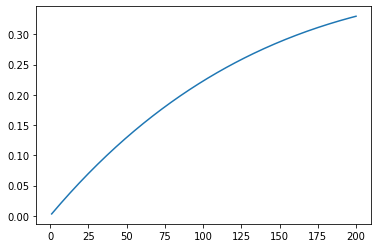

In [19]:
simulator = gachasimu(0.003)
simulator.m_get_prob(200, 1, visualize=True)
